# Task-2

1. Implement of Basic CNN using Tensorflow for classification task of the given dataset.
2. Clearly show the F1-accuracy and the confusion matrix.

Your may use AI Tools such as **ChatGPT or Claude** for this task.

## For Guide go through these :-

1. [Basic Blog](https://dev.to/abhinowww/building-a-basic-convolutional-neural-network-cnn-in-python-3bab)

2. [Kaggle Notebook with CNN Details](https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide)

3. Please watch DeepLizard's CNN videos !!


## Dataset Description ( Animal Dataset )
1. This dataset contains 15 folders of images of size (224X224X3) . Each folder further has around 150-200 images.
2. Folders represents a class corresponding to the folder name.

In [ ]:
!gdown https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf
!7z x animal_data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf
From (redirected): https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf&confirm=t&uuid=a986bdf8-da8a-40d9-afa9-055d87a3f7bb
To: /content/animal_data.zip
100% 38.9M/38.9M [00:01<00:00, 28.8MB/s]

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 38922825 bytes (38 MiB)

Extracting archive: animal_data.zip
--
Path = animal_data.zip
Type = zip
Physical Size = 38922825

  0%      2% 136          4% 256 - animal_data/Cat/Cat_18_2.jpg                                        13% 685 - __MACOSX/animal_data/Dolphin/._Dolphin_7.jpg

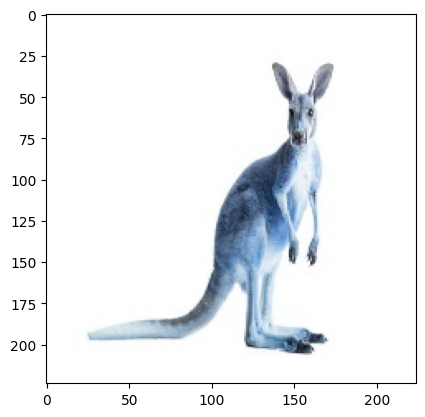

In [ ]:
# Sample of reading a random image
import cv2
import matplotlib.pyplot as plt
temp = cv2.imread("/content/animal_data/Kangaroo/Kangaroo_1.jpg")
# temp = cv2.resize(temp, (64, 64)) #you may want to resize this image for lesser number of pixels
plt.imshow(temp)

### Make x_train, x_test, y_train, y_test to feed your CNN

In [ ]:
# Beforehand map your classes to numbers such as Bear-0,Bird-1 and so on
# Hint:use os library iterate throught the folder and read image and append image data and its label to seprate variables
# Use test_train_split library to split your dataset and use random state 42

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Mapping classes to numbers
class_names = os.listdir("/content/animal_data")  # List the folder names, each representing a class
class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Image data and labels
image_data = []
labels = []

# Read images from each folder
for class_name in class_names:
    class_folder = os.path.join("/content/animal_data", class_name)
    if os.path.isdir(class_folder):
        for image_name in os.listdir(class_folder):
            # Check if it's an image file (you may use a more strict check if needed)
            if image_name.endswith(".jpg"):
                # Read and resize image
                img_path = os.path.join(class_folder, image_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (224, 224))  # Resize image to 224x224
                image_data.append(img)
                labels.append(class_to_label[class_name])

# Convert to numpy arrays
X = np.array(image_data)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")




Training data shape: (1316, 224, 224, 3)
Testing data shape: (330, 224, 224, 3)


### Make CNN Architecture and Train the model

In [ ]:
# You may use blogs and kaggle notebook attached for this part
# Hint : Use softmax layer as output layer in CNN for probabilities{ needed later :) }

import tensorflow as tf
from tensorflow.keras import layers, models

# Build CNN model
model = models.Sequential()

# Add layers
model.add(layers.InputLayer(input_shape=(224, 224, 3)))  # Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())  # Flatten to feed into fully connected layers
model.add(layers.Dense(128, activation='relu'))  # Fully connected layer
model.add(layers.Dense(len(class_names), activation='softmax'))  # Output layer with softmax

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.0961 - loss: 222.8965 - val_accuracy: 0.1667 - val_loss: 2.6932
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.2832 - loss: 2.3872 - val_accuracy: 0.3364 - val_loss: 2.5549
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.6281 - loss: 1.5407 - val_accuracy: 0.4879 - val_loss: 2.6892
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.8117 - loss: 0.9881 - val_accuracy: 0.5455 - val_loss: 4.1990
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.9109 - loss: 0.4958 - val_accuracy: 0.6061 - val_loss: 5.7843
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.9441 - loss: 0.3616 - val_accuracy: 0.6273 - val_loss: 6.9631
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.9588 - loss: 0.2560 - val_accuracy: 0.6212 - val_loss: 7.0626
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.9676 - loss: 0.2576 - val_accuracy: 0.6000 -

KeyboardInterrupt: 

### Report Accuracy and Confusion Matrix.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━

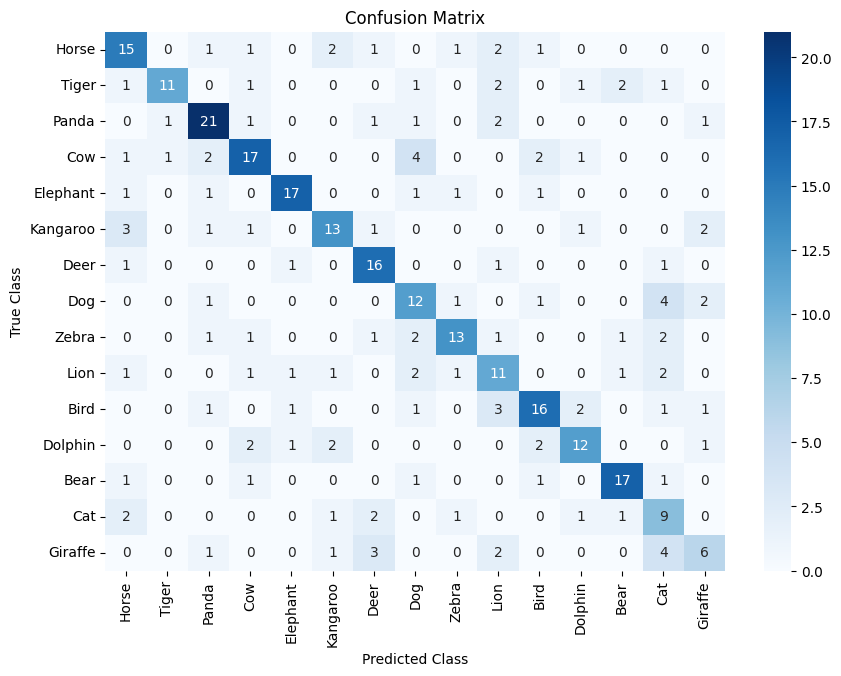

In [ ]:
# You must manually find the Accuracy using for loop over the testing data
# and comparing the results with orignal labels rather than using a library

# You may use library for confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def manual_accuracy(model, X_test, y_test):
    correct_predictions = 0
    total_predictions = len(y_test)


    for i in range(total_predictions):
        # Predict the class for the i-th sample
        prediction = model.predict(np.expand_dims(X_test[i], axis=0))

        # Get the index of the predicted class with the highest probability
        predicted_class = np.argmax(prediction)

        # Compare with the true label
        if predicted_class == y_test[i]:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / total_predictions
    return accuracy

# Calculate the manual accuracy
accuracy = manual_accuracy(model, X_test, y_test)
print(f"Manual Accuracy: {accuracy * 100:.2f}%")

# Predict on test data for confusion matrix
y_pred = []
for i in range(len(X_test)):
    prediction = model.predict(np.expand_dims(X_test[i], axis=0))
    predicted_class = np.argmax(prediction)
    y_pred.append(predicted_class)

# confusion mat
cm = confusion_matrix(y_test, y_pred)

# Plot con mat
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


### Write a program to use a image path and determine its probability of being that animal for each animal

In [ ]:
#  Example Output for some image
# Bird: 0.0023
# Deer: 0.0000
# Giraffe: 0.0000
# Zebra: 0.0000
# Dolphin: 0.0109
# Cow: 0.0004
# Horse: 0.0005
# Dog: 0.9853
# Cat: 0.0000
# Tiger: 0.0000
# Bear: 0.0000
# Lion: 0.0000
# Kangaroo: 0.0005
# Elephant: 0.0000
# Panda: 0.0000

import cv2
import numpy as np

# Function to predict the probabilities for each class given an image path
def predict_animal_probability(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize to match input shape of the model

    # Expand dimensions to match batch size
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict probabilities
    probabilities = model.predict(img)[0]  # Get the probabilities for the image

    # Output the class probabilities
    for class_name, prob in zip(class_names, probabilities):
        print(f"{class_name}: {prob:.4f}")

# Example usage
img_path = "/content/animal_data/Kangaroo/Kangaroo_1.jpg"
predict_animal_probability(img_path)



# Hint Use softmax layer in CNN for probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Horse: 0.0000
Tiger: 0.0000
Panda: 0.0000
Cow: 0.0000
Elephant: 0.0759
Kangaroo: 0.9233
Deer: 0.0002
Dog: 0.0000
Zebra: 0.0001
Lion: 0.0002
Bird: 0.0000
Dolphin: 0.0000
Bear: 0.0000
Cat: 0.0000
Giraffe: 0.0002
